In [323]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
        
data = load_breast_cancer()
X, Y = data.data, data.target

In [324]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [325]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# print(X_test.shape)

In [326]:
X_train = torch.from_numpy(X_train_scaled.astype(np.float32))[:, :1]
X_test = torch.from_numpy(X_test_scaled.astype(np.float32))[:, :1]
y_train = torch.from_numpy(y_train.astype(np.float32)).reshape(-1, 1)
y_test = torch.from_numpy(y_test.astype(np.float32)).reshape(-1, 1)

In [327]:
# X_train[:10]

### Define neural network

In [328]:
class BinaryClassification(torch.nn.Module):
  def __init__(self, input_dimension):
    super().__init__()
    self.linear = torch.nn.Linear(input_dimension, 1, bias = False)

  def forward(self, input_dimension):
    W1 = self.linear(input_dimension)
    return torch.sigmoid(W1)
        

In [329]:
X_train.shape

torch.Size([455, 1])

In [330]:
_, input_dimension = X_train.shape

model = BinaryClassification(input_dimension)

In [331]:
def configure_loss_function(): 
  return torch.nn.BCELoss()

def configure_optimizer(model):
  return torch.optim.Adam(model.parameters(), lr = .00005)

def full_gd(model, criterion, optimizer, X_train, y_train, n_epochs=2000):
  train_losses = np.zeros(n_epochs)
  test_losses = np.zeros(n_epochs)

  for it in range(n_epochs): 
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    outputs_test = model(X_test)
    loss_test = criterion(outputs_test, y_test)

    train_losses[it] = loss.item()
    test_losses[it] = loss_test.item()
  return train_losses, test_losses

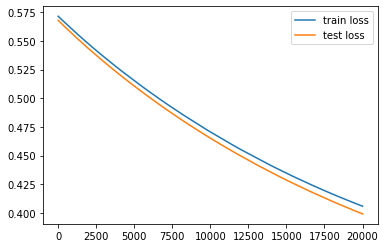

In [332]:
criterion = configure_loss_function()
optimizer = configure_optimizer(model)
train_losses, test_losses = full_gd(model, criterion, optimizer, X_train, y_train, n_epochs = 20000)

plt.plot(train_losses, label = 'train loss')
plt.plot(test_losses, label = 'test loss')
plt.legend()
plt.show()

In [333]:
"""evaluate model"""

with torch.no_grad():
  p_train = model(X_train)
  p_train = (p_train.numpy() > 0)

  train_acc = np.mean(y_train.numpy() == p_train)

  p_test = model(X_test)
  p_test = (p_test.numpy() > 0)
  
  test_acc = np.mean(y_test.numpy() == p_test)

print(train_acc)
print(test_acc)

0.621978021978022
0.6491228070175439
